# 시계열(Time series) 데이터

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [16]:
# 다양한 날짜 형식 데이터 변환 시도
date_strings = [
    '2025년8월6일',
    '2023-01-15',
    '2025/08/05',
    '2023.01.15',
    '20230115',
    '15/01/2023', 
    'Jan 15, 2023',
    '15-Jan-2023',
    '2023-12-40'
]

for date in date_strings:
    # 예외 처리 (에러 처리)    try, except !!!!!!!!!!!
    try: #일단 해봐. 되면 좋고
        parsed = pd.to_datetime(date)
        print(f'{date} -> {parsed}')
    except: # 안 되면 뻗지 말고, 아래 코드 실행해
        print('err', date)

err 2025년8월6일
2023-01-15 -> 2023-01-15 00:00:00
2025/08/05 -> 2025-08-05 00:00:00
2023.01.15 -> 2023-01-15 00:00:00
20230115 -> 2023-01-15 00:00:00
15/01/2023 -> 2023-01-15 00:00:00
Jan 15, 2023 -> 2023-01-15 00:00:00
15-Jan-2023 -> 2023-01-15 00:00:00
err 2023-12-40


In [17]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정!!!!!!!!!! # inplace=True는 원본을 직접 수정하겠다!는 뜻
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
daily_sales.head()


일별 날짜 (총 365개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]...
월별 날짜 (총 12개): [Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]
주별 날짜 (총 53개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00')]...

일별 매출 데이터:


C:\Users\agnes\AppData\Local\Temp\ipykernel_20268\442883849.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')


,sales
date,
2023-01-01,109934.283060
2023-01-02,105569.429486
2023-01-03,123735.698233
2023-01-04,136348.024536
2023-01-05,93042.167918


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


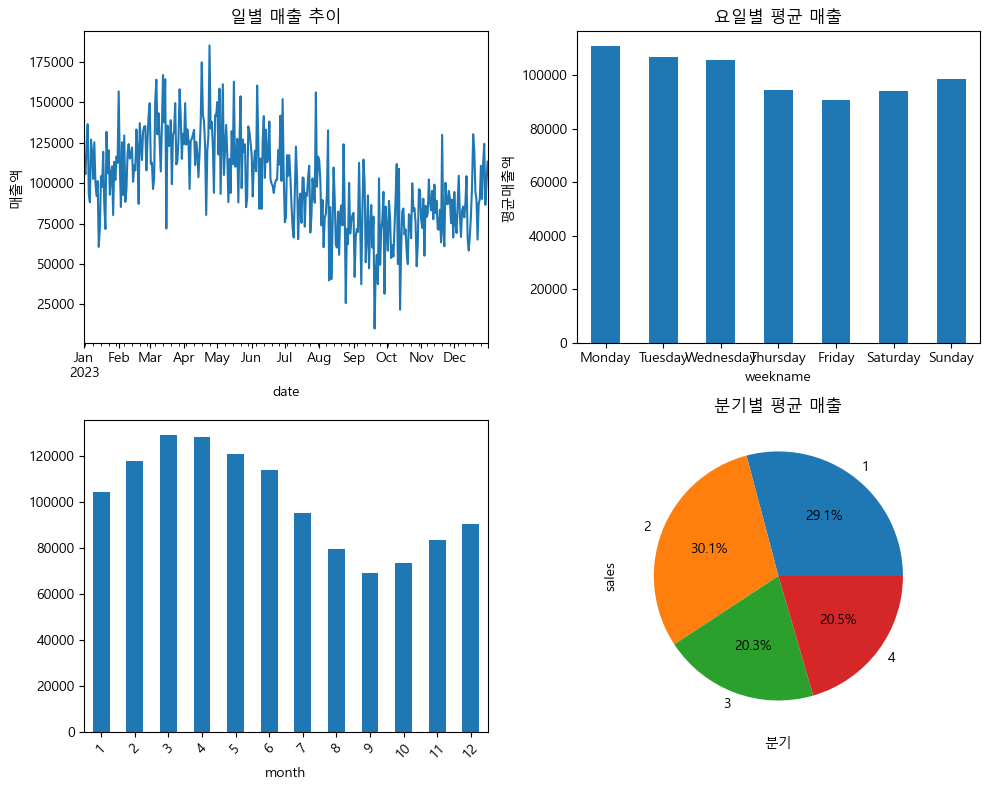

In [18]:
# Index (인덱스가 datetime이라서 바로 접근 가능)
print(type(daily_sales.index)) # 인덱스의 타입 확인해봄
daily_sales['year'] = daily_sales.index.year
daily_sales['month'] = daily_sales.index.month
daily_sales['day'] = daily_sales.index.day
daily_sales['weekday'] = daily_sales.index.weekday # 월요일이 0
daily_sales['weekname'] = daily_sales.index.day_name() # 얘만 함수!!!!!!!!
daily_sales['quarter'] = daily_sales.index.quarter

daily_sales.head()


# 요일별 평균 매출
weekday_avg = daily_sales.groupby('weekname')['sales'].mean()

# reindx( ) 원하는 순서대로 '시리즈나 DF 인덱스'의 순서 바꾸기
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order)


# 시각화
plt.figure(figsize=(10, 8))

# 일별 매출 추이
plt.subplot(2, 2, 1) # 행 2, 열 2, 중에 첫번째에 그래프 둘거임
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

# 요일별 평균 매출
plt.subplot(2, 2, 2)
weekday_avg.plot(kind='bar')
plt.title('요일별 평균 매출')
plt.ylabel('평균매출액')
plt.xticks(rotation=0)

#월별 평균 매출
plt.subplot(2, 2, 3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar')
plt.xticks(rotation=45) # 라벨 각도

# 분기별 평균 매출
plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind='pie', autopct='%1.1f%%') # 안에 값 넣어주기. '%최소자릿수.소수점이하자릿수f%%'
plt.title('분기별 평균 매출')
plt.xlabel('분기')


# 레이아웃 겹치지 않게 조정
plt.tight_layout()
plt.show()

In [19]:
# 인덱싱 및 슬라이싱
f'전체 데이터 기간, {daily_sales.index.min()} ~ {daily_sales.index.max()}'

'전체 데이터 기간, 2023-01-01 00:00:00 ~ 2023-12-31 00:00:00'

In [20]:
# 특정 날짜 선택
d1 = daily_sales.loc['2023-01-15']
# 특정 날짜에 있는 col만 선택 가능
d1['sales']

np.float64(72661.82632991784)

In [21]:
# 날짜 범위 선택
jan_half = daily_sales['2023-01-01':'2023-01-15']
# 날짜 개수, 매출 총합 -3자리수마다 , 찍고 소수점 날려!!!!!!!!!!
len(jan_half), format(jan_half['sales'].sum(), ",.0f")

(15, '1,557,049')

In [22]:
# 부분 문자열 활용해서 월 데이터 불러올 수 있음
daily_sales.loc['2023-04']

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-04-01,124116.291222,2023,4,1,5,Saturday,2
2023-04-02,149372.622003,2023,4,2,6,Sunday,2
2023-04-03,123774.752707,2023,4,3,0,Monday,2
2023-04-04,133182.424610,2023,4,4,1,Tuesday,2
2023-04-05,126463.065796,2023,4,5,2,Wednesday,2
2023-04-06,96328.378472,2023,4,6,3,Thursday,2
2023-04-07,126072.893472,2023,4,7,4,Friday,2
2023-04-08,127255.949952,2023,4,8,5,Saturday,2
2023-04-09,129899.974611,2023,4,9,6,Sunday,2


In [23]:
# 조건부 필터링 (weekname col이 Friday인 애들만)
daily_sales[ daily_sales['weekname'] == 'Friday' ]


# 특정 월의 주말만 뽑기
# 1. 6월 데이터만 뽑기
june = daily_sales.loc['2023-06']
# 2. 6월의 토/일만 True mask
weekend_mask = daily_sales.loc['2023-06']['weekday'].isin([5, 6]) # 0이 월요일이니까

june[weekend_mask]

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-06-03,111414.940332,2023,6,3,5,Saturday,2
2023-06-04,119996.234696,2023,6,4,6,Sunday,2
2023-06-10,84019.290727,2023,6,10,5,Saturday,2
2023-06-11,126593.103997,2023,6,11,6,Sunday,2
2023-06-17,138027.509610,2023,6,17,5,Saturday,2
2023-06-18,102502.903094,2023,6,18,6,Sunday,2
2023-06-24,102089.477070,2023,6,24,5,Saturday,2
2023-06-25,120406.110304,2023,6,25,6,Sunday,2


In [24]:
# 마지막 10일간의 데이터
daily_sales.tail(10)


# 각 월별 마지막 10일..........
daily_sales.loc['2023-01'].tail()
daily_sales.loc['2023-02'].tail()


for month in range(1, 13):
    month_str = 

SyntaxError: invalid syntax (272120186.py, line 11)

In [ ]:
# 시각화
plt.figure(figsize=(15, 10))

# 전체 날짜-매출 데이터
plt.subplot(2, 3, 1)
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')

# 1월 데이터
plt.subplot(2, 3, 2)
jan_data = daily_sales.loc['2023-01']
jan_data['sales'].plot()

# 1 쿼터 데이터
plt.subplot(2, 3, 3)
q1_data = daily_sales[daily_sales['quarter'] == 1]
q1_data['sales'].plot()

# 금요일 매출 추이
plt.subplot(2, 3, 4)
friday_data = daily_sales[daily_sales['weekday'] == 4]
friday_data['sales'].plot()


# 최근 30일
plt.subplot(2, 3, 5)
latest_data = daily_sales.tail(30)
latest_data['sales'].plot()

# 월별 박스플롯 ??????????????????????? 이 부분 한번 더 보기
plt.subplot(2, 3, 6)

all_month = []
for m in range(1, 13):
    all_month.append(daily_sales[daily_sales['month'] == m]['sales'].values)

all_month = [daily_sales[daily_sales['month'] == m]['sales'].values for m in range(1, 13)]

plt.boxplot(all_month)
plt.title('월별 매출 분포')
plt.xlabel('월')
plt.ylabel('매출액')



plt.tight_layout()
plt.show()

In [ ]:
%pip install -q statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 시계열 데이터의 추세, 계절성 '분해' 함수
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# 월 기준으로 리샘플링
daily_sales.resample('M')['sales'].mean()

C:\Users\agnes\AppData\Local\Temp\ipykernel_20268\3180764508.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_sales.resample('M')['sales'].mean()


date
2023-01-31    104107.064418
2023-02-28    117734.578352
2023-03-31    128912.491972
2023-04-30    128234.072429
2023-05-31    120658.587866
2023-06-30    113914.972247
2023-07-31     95139.246890
2023-08-31     79330.974225
2023-09-30     69078.105530
2023-10-31     73108.426146
2023-11-30     83359.306665
2023-12-31     90306.009649
Freq: ME, Name: sales, dtype: float64

C:\Users\agnes\AppData\Local\Temp\ipykernel_20268\297140032.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = daily_sales.resample('M')['sales'].mean()


NameError: name 'seasonal_decompose' is not defined

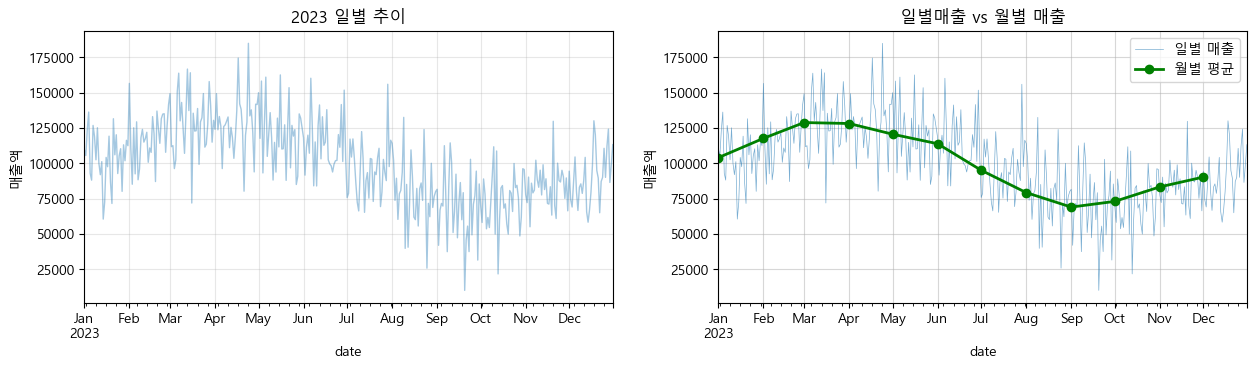

In [ ]:
plt.figure(figsize=(15, 12))

# 전체 추이
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth=1, alpha=0.4) # 선굵기, 투명도 설정
plt.grid(True, alpha=0.3) # 보조선
plt.title('2023 일별 추이')
plt.ylabel('매출액')



## 일별, 월별 매출 같이 보자

# 일별 매출
plt.subplot(3, 2, 2)
daily_sales['sales'].plot(linewidth=0.5, alpha=0.6, label='일별 매출')
# 일단위를 -> 월 단위 간격으로 재조정(resample) 후 평균내기
monthly_avg = daily_sales.resample('M')['sales'].mean()
monthly_avg.plot(linewidth=2, marker='o', label='월별 평균', color='green')

plt.title('일별매출 vs 월별 매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.5)
plt.legend() # 범례(label) 표시하겠당~



# 시계열 분해(Seasonal Decomposition)
# 1. trend(추세) -> 전반적인 증감
# 2. seasonal(계절성) -> 주기적으로 반복되는 패턴 (매주 금요일 매출 증가)
# 3. residual (잔차) -> 추세/계절성을 제외한 마저이 요인 (갑작스런 이벤트, 노이즈)

decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7) # 덧셈 모델, 주간 패턴

# 7일 이동평균으로 트렌드 확인
plt.subplot(3, 2, 3)
decomp.trend.plot() # trend
plt.title('추세 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

# 7일 이동평균으로 계절성 확인
plt.subplot(3, 2, 4)
decomp.seasonal.plot() # seasonal
plt.title('계절 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)


# 히트맵(Heatmap) - 월별, 요일별
plt.subplot(3, 2, 5)
pt = daily_sales.pivot_table(
    values='sales',
    index='month',
    columns='weekday',
    aggfunc='mean'
)

#           히트맵 숫자표시, 숫자 형식, 색깔(yellow-orange-red)
sns.heatmap(pt, annot=True, fmt='.0f', cmap='YlOrRd')

# 분기별 박스 플롯
plt.subplot(3, 2, 6)
sns.boxplot(x='quarter', y='sales', data=daily_sales)


plt.tight_layout()
plt.show()

quarter
1    1.052017e+07
2    1.100489e+07
3    7.480920e+06
4    7.566627e+06
Name: sales, dtype: float64


C:\Users\agnes\AppData\Local\Temp\ipykernel_20268\356707397.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarter_sales = daily_sales.resample('M')['sales'].sum()


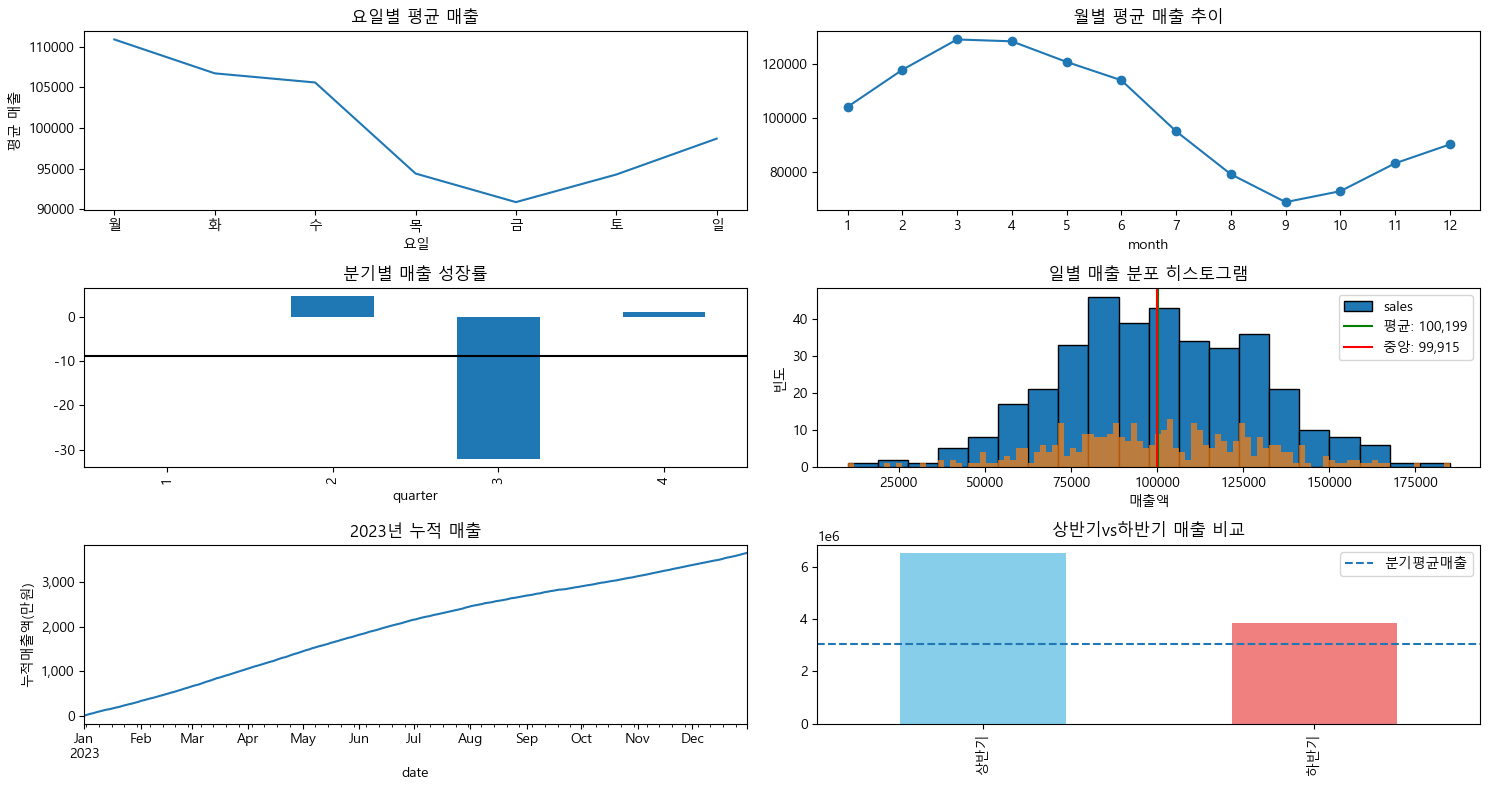

In [25]:
plt.figure(figsize=(15, 8))


# 주간 패턴
plt.subplot(3, 2, 1)
daily_sales.groupby('weekday')['sales'].mean().plot()
plt.title('요일별 평균 매출')
plt.ylabel('평균 매출')
plt.xlabel('요일')
plt.xticks(ticks=range(7), labels=['월', '화', '수', '목', '금', '토', '일'])


# 월별 패턴
plt.subplot(3, 2, 2)
daily_sales.groupby('month')['sales'].mean().plot(marker='o')
plt.title('월별 평균 매출 추이')
# x축 기본세팅 -> month는 정수라 2 간격.. 바꿔주자!
plt.xticks(ticks=range(1, 13))


# 분기별 성장률 .pct_change() 변화율을 보여주는 거! - 막대그래프
plt.subplot(3, 2, 3)
quarter_sum = daily_sales.groupby('quarter')['sales'].sum()
print(quarter_sum)
q_growth = quarter_sum.pct_change() * 100
q_growth.plot(kind='bar')
plt.title('분기별 매출 성장률')
# 기준선 표시!!!!!!!!!!!!!!!
plt.axhline(y=q_growth.mean(), color='black', linestyle='-')




# 매출 분포 히스토그램 (optional)
plt.subplot(3, 2, 4)
daily_sales['sales'].plot(kind='hist', bins=20, edgecolor='black')
# 이렇게 써도 됨!!             # bins=구간 나누기
plt.hist(daily_sales['sales'], bins=100, alpha=0.7)
plt.title('일별 매출 분포 히스토그램')
plt.xlabel('매출액')
plt.ylabel('빈도')
# 평균 세로선 긋기!!!!!!!!
sales_avg = daily_sales['sales'].mean()
plt.axvline(sales_avg, color='green', label=f'평균: {sales_avg:,.0f}') # 3자리 + 소수점 x
# 중앙값 세로선 긋기!
sales_med = daily_sales['sales'].median()
plt.axvline(sales_med, color='red', label=f'중앙: {sales_med:,.0f}') # 3자리 + 소수점 x

plt.legend()



# 2023 누적 매출 (.cumsum())
plt.subplot(3, 2, 5)
daily_sales['누적합'] = daily_sales['sales'].cumsum()
daily_sales['누적합'].plot()
plt.title('2023년 누적 매출')
plt.ylabel('누적매출액(만원)')
# y축 단위 (만원으루) 바꾸기 (유연하게 사용 가능~)
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/10000:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)



# 자유롭게! 상반기vs하반기 매출 비교
plt.subplot(3, 2, 6)
quarter_sales = daily_sales.resample('M')['sales'].sum()
first_half = quarter_sales[:2].sum()
second_half = quarter_sales[3:4].sum()
# 스칼라는 plot() 안 됨! Series로 바꿔주기!!
half_year_sales = pd.Series({'상반기': first_half, '하반기': second_half})
half_year_sales.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('상반기vs하반기 매출 비교')
plt.axhline(y=quarter_sales.mean(), linestyle='--', label='분기평균매출')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 시계열 데이터 연산
# 이동평균 7일
daily_sales['ma_7'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['ma_30'] = daily_sales['sales'].rolling(window=30).mean()

# 이동평균 시각화
plt.figure(figsize=(15, 8))

daily_sales[['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.subplot(2, 2, 1)
plt.title('이동평균')
plt.legend(['원본', '이평7', '이평30'])

# 특정기간 확대 (6-8월)
plt.subplot(2, 2, 2)
daily_sales.loc['2023-06':'2023-08'][['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.title('6-8상세')
plt.legend(['원본', '이평7', '이평30'])

# 변화율 계산
daily_sales['daily_change'] = daily_sales['sales'].pct_change()
daily_sales['weekly_change'] = daily_sales['sales'].pct_change(periods=7) #주간 변화율

# 일일변화율 시각화
daily_sales['daily_change'].plot()
# 주간변화율 시각화
daily_sales['weekly_change'].plot()


plt.tight_layout()
plt.show()

## 리샘플링
- 원하는 주기로 나누어준다

In [ ]:
# 집계함수 적용 가능 (사실상 그루핑)
weekly_stats = daily_sales['sales'].resample('W').agg(['min', 'max', 'std', 'mean'])
print(weekly_stats)

# 주간 매출총합
w_sales = daily_sales['sales'].resample('W').sum()
# 월간
m_sales = daily_sales['sales'].resample('ME').sum() # 월 마지막날 기준
# 분기
q_sales = daily_sales['sales'].resample('QE').sum() # 분기 마지막날 기준


# 리샘플링 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
w_sales.plot(marker='o')
plt.title('주별 총 매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
m_sales.plot(kind='bar')
plt.title('월별 총 매출')
plt.ylabel('매출액')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
q_sales.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('분기별 총 매출')
plt.ylabel('매출액')
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
weekly_stats[['min', 'mean', 'max']].plot()
plt.title('주간 매출 통계 (최소/평균/최대)')
plt.ylabel('매출액')
plt.legend(['최소', '평균', '최대'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# 실습: 주식 데이터 시계열 분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 가상의 주식 데이터 생성
np.random.seed(42)

# 1년간의 일별 주식 데이터 생성
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
n_days = len(dates)

# 주식 가격 시뮬레이션 (기하 브라운 운동)
initial_price = 100000  # 초기 가격
volatility = 0.02  # 일일 변동성
drift = 0.0005  # 일일 드리프트

# 가격 변화율 생성
returns = np.random.normal(drift, volatility, n_days)
returns[0] = 0  # 첫날은 변화 없음

# 누적곱으로 가격 계산
price_multipliers = (1 + returns).cumprod()
prices = initial_price * price_multipliers

# 거래량 생성 (가격 변동성과 반비례 관계)
base_volume = 1000000
volume = base_volume + np.random.normal(0, 200000, n_days) - np.abs(returns) * 5000000
volume = np.maximum(volume, 100000)  # 최소 거래량 보장

# 데이터프레임 생성
stock_data = pd.DataFrame({
    'date': dates,        # 날짜
    'close': prices,      # 종가
    'volume': volume,     # 거래량
    'returns': returns,   # 전날 대비 가격 변화율
})

stock_data.set_index('date', inplace=True)

# 고가, 저가, 시가 생성 (종가 기준)
# 시가를 기준으로 고가/저가를 생성
stock_data['open'] = stock_data['close'].shift(1) * (1 + np.random.normal(0, 0.005, n_days))
stock_data['open'].iloc[0] = initial_price

# 고가 = 시가보다 높은 값
stock_data['high'] = stock_data['open'] * (1 + np.abs(np.random.normal(0, 0.01, n_days)))

# 저가 = 시가보다 낮은 값
stock_data['low'] = stock_data['open'] * (1 - np.abs(np.random.normal(0, 0.01, n_days)))

C:\Users\agnes\AppData\Local\Temp\ipykernel_8268\2567818495.py:48: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['open'].iloc[0] = initial_price


In [ ]:
df = stock_data[['volume', 'open', 'close', 'high', 'low', 'returns']]

# 결측치 확인 -> 있으면 처리
stock_data.isna().sum()
df.head()


C:\Users\agnes\AppData\Local\Temp\ipykernel_8268\998345640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_20'] = df['close'].rolling(window=20).mean()
C:\Users\agnes\AppData\Local\Temp\ipykernel_8268\998345640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_60'] = df['close'].rolling(window=60).mean()


,volume,open,close,high,low,returns,ma_20,ma_60
date,,,,,,,,
2023-01-01,9.197559e+05,100000.000000,100000.000000,100080.716580,99861.544016,0.000000,NaN,NaN
2023-01-02,1.033492e+06,99510.813611,99773.471398,99589.064129,98292.504475,-0.002265,NaN,NaN
2023-01-03,9.352496e+05,99977.135371,101115.800810,101974.879174,99768.159906,0.013454,NaN,NaN
2023-01-04,8.647322e+05,100255.010287,104246.406382,101173.674692,99402.320918,0.030961,NaN,NaN
2023-01-05,8.244827e+05,104782.835266,103810.336628,105145.895715,104174.546336,-0.004183,NaN,NaN


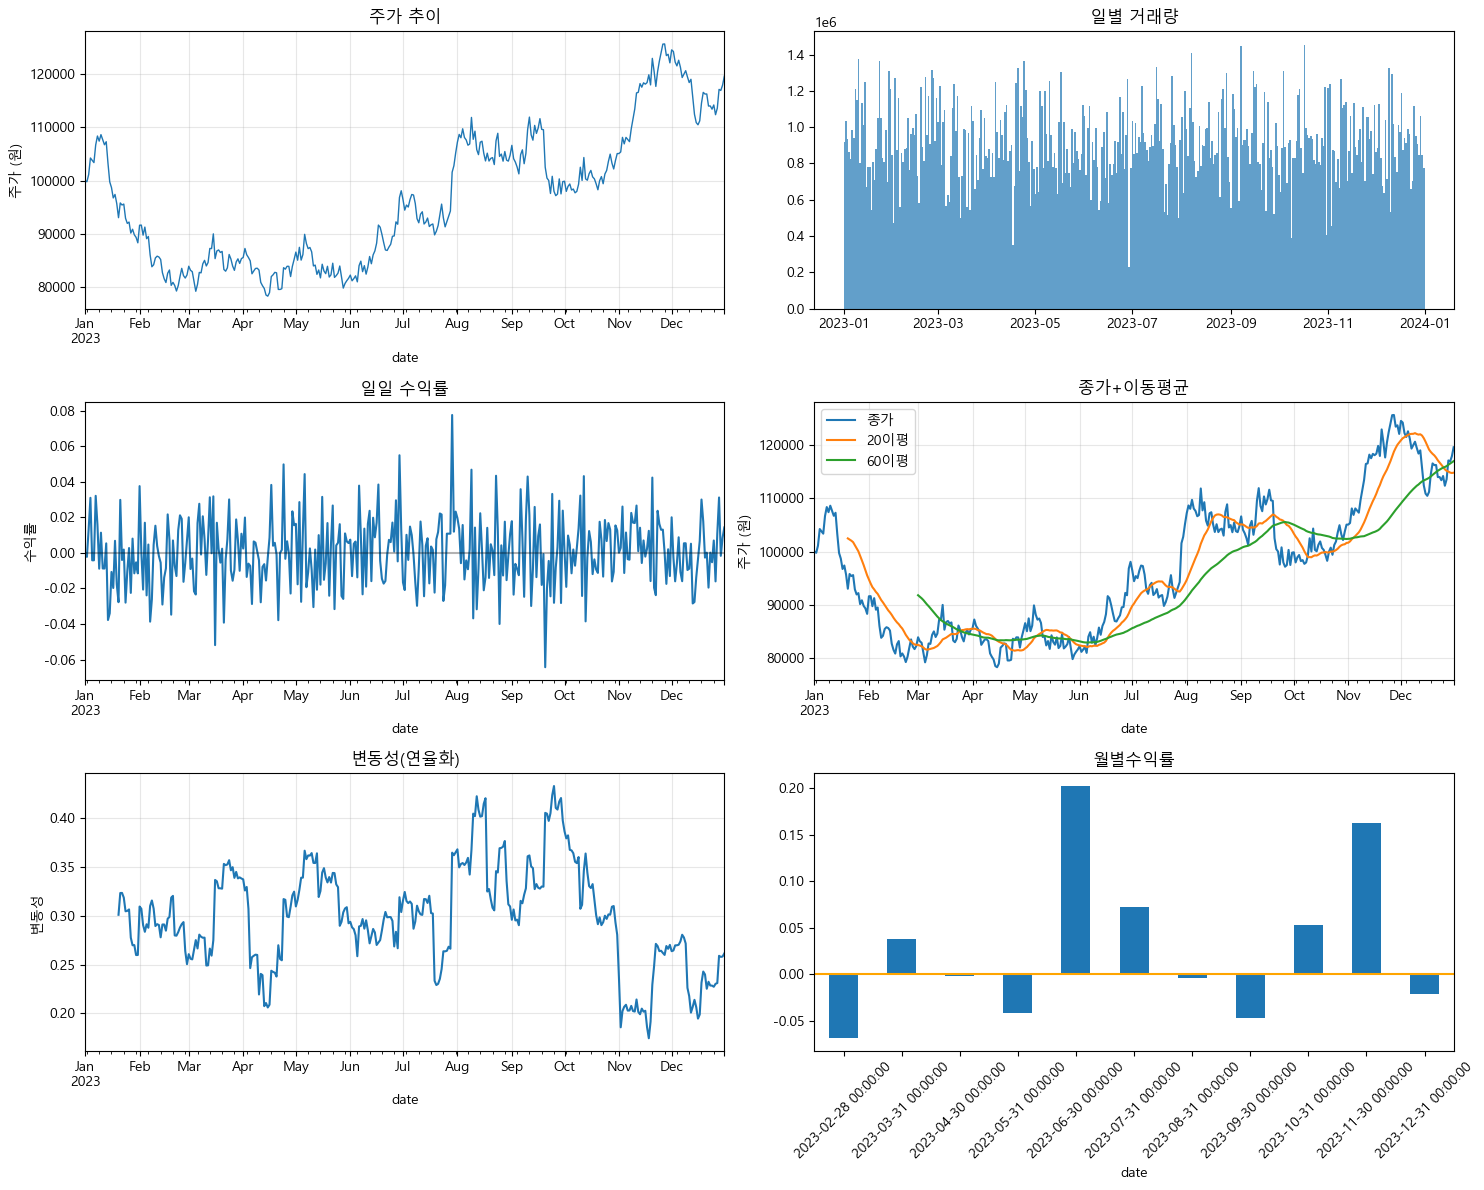

In [ ]:
# 기본 주식 차트
plt.figure(figsize=(15, 12))

# 주가 추이
plt.subplot(3, 2, 1)
df['close'].plot(linewidth=1)
plt.title('주가 추이')
plt.ylabel('주가 (원)')
plt.grid(True, alpha=0.3)

# 거래량
plt.subplot(3, 2, 2)
# bar,     x축,      y축
plt.bar(df.index, df['volume'], width=1, alpha=0.7)
plt.title('일별 거래량')

# 일일 수익률(returns) <- 종가 기준으로 어제보다 올랐냐
plt.subplot(3, 2, 3)
df['returns'].plot()
plt.title('일일 수익률')
plt.ylabel('수익률')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 이동평균
plt.subplot(3, 2, 4)
df['ma_20'] = df['close'].rolling(window=20).mean()
df['ma_60'] = df['close'].rolling(window=60).mean()
ax = plt.gca()
df[['close', 'ma_20', 'ma_60']].plot(ax=ax)

plt.title('종가+이동평균')
plt.ylabel('주가 (원)')
plt.legend(['종가', '20이평', '60이평'])
plt.grid(True, alpha=0.3)


# 변동성 (Volatility)
plt.subplot(3, 2, 5)
df['volatility'] = df['returns'].rolling(window=20).std() * np.sqrt(252) # 평균거래일로 루트 씌움
df['volatility'].plot()
plt.title('변동성(연율화)')
plt.ylabel('변동성')
plt.grid(True, alpha=0.3)

# 월별 수익률
plt.subplot(3, 2, 6)
# 월말 기준 종가 변동률 (1월은 값 없어서 버림)
monthly_returns = df['close'].resample('ME').last().pct_change().dropna()
monthly_returns.plot(kind='bar')
plt.title('월별수익률')
plt.xticks(rotation=45)
plt.axhline(y=0, color='Orange', linestyle='-')


plt.tight_layout()
plt.show()


In [ ]:
# 기술적 지표 계산

# RSI (Relative Strength Index)
def caculate_rsi(prices: pd.Series, window=14):
    # 이전 데이터와의 수치 차이
    delta = prices.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


# 볼링거 밴드
def calculate_bollinger_bands(prices: pd.Series, window=20, num_std=2):
    rolling_mean = prices.rolling(window=window).mean()
    rolling_std = prices.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band


df['rsi'] = caculate_rsi(stock_data['close'])

df['bb_upper'], df['bb_lower'] = calculate_bollinger_bands(df['close'])

# delta = df['close'].diff()
# delta.where(delta > 0, 0).rolling(window=14).mean()

In [ ]:
df.tail()

,volume,open,close,high,low,returns,ma_20,ma_60,volatility,rsi,bb_upper,bb_lower
date,,,,,,,,,,,,
2023-12-27,9.087687e+05,112355.611347,113619.495550,114333.927109,112208.136779,0.010887,115203.704272,116097.314874,0.231025,44.399750,177318.913339,53088.495206
2023-12-28,8.479129e+05,113598.349691,117159.285740,114454.133340,113511.047220,0.031155,115059.912923,116347.001526,0.258933,62.533314,173700.205167,56419.620678
2023-12-29,1.061140e+06,117585.528528,116963.020156,118033.715629,117321.130433,-0.001675,114873.902826,116567.113257,0.257798,67.456469,168115.299491,61632.506162
2023-12-30,8.493769e+05,116993.398895,117961.209991,118502.324479,116232.938782,0.008534,114795.964677,116781.886926,0.258203,70.846430,165573.023465,64018.905889
2023-12-31,7.728247e+05,118393.325541,119648.395003,119190.327330,118193.649666,0.014303,114855.696264,117024.636798,0.261334,72.308054,167684.106304,62027.286225


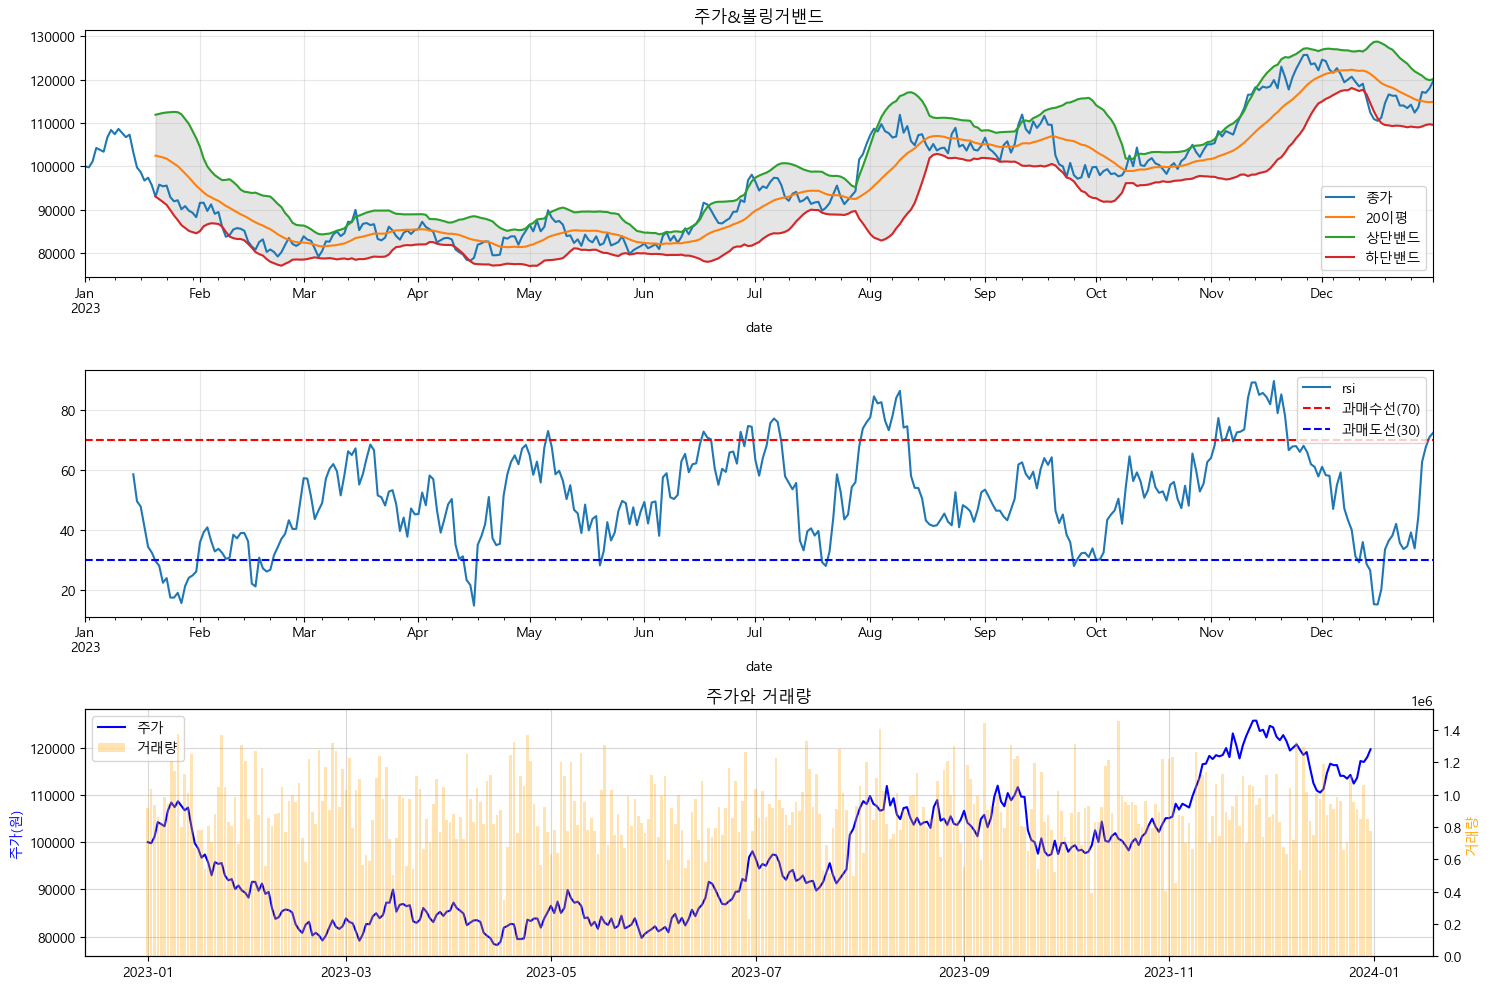

In [ ]:
# r기술분석 차트
plt.figure(figsize=(15, 10))

# 볼링거 밴드 & 주가
plt.subplot(3, 1, 1)
ax = plt.gca()
df[['close', 'ma_20', 'bb_upper', 'bb_lower']].plot(ax=ax)

plt.fill_between(
    df.index,
    df['bb_upper'],
    df['bb_lower'],
    alpha=0.2, color='grey'
)

plt.legend(['종가', '20이평', '상단밴드', '하단밴드'])
plt.title('주가&볼링거밴드')
plt.grid(True, alpha=0.3)


# RSI
plt.subplot(3, 1, 2)
df['rsi'].plot()
plt.axhline(y=70, color='red', linestyle='--', label='과매수선(70)')
plt.axhline(y=30, color='blue', linestyle='--', label='과매도선(30)')
plt.legend()
plt.grid(True, alpha=0.3)


# 거래량 <-> 가격
plt.subplot(3, 1, 3)
# 축을 직접 정의하고 그림
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.index, df['close'], '-b', label='주가')
ax2.bar(df.index, df['volume'], alpha=0.3, color='orange', label='거래량')

ax1.set_ylabel('주가(원)', color='b')
ax2.set_ylabel('거래량', color='orange')
ax1.set_title('주가와 거래량')
ax1.grid(True, alpha=0.5)

line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# 수익률 분석

# 누적 수익률
# 마지막날 종가
cum_return = (df['close'].iloc[-1] / df['close'].iloc[0] - 1) * 100
print(f'2023 총 수익률: {cum_return:.2f}%')

# 변동성 분석 ( 1년간 수익이 얼마나 요동칠 가능성이 있는가)
annual_volatility = df['returns'].std() * np.sqrt(252) * 100
print(f'연율화 변동성: {annual_volatility:.2f}%')

# 샤프 비율 (무위험 수익률을 3% 가정) -> 높을수록 low risk, high return
risk_free_rate = 0.03 # 은행 예금
# 기대수익률 - 무위험 수익률
sharpe_ratio = (df['returns'].mean() * 252 - risk_free_rate) / (df['returns'].std() * np.sqrt(252))
print(f'샤프비율: {sharpe_ratio:.3f}%')

# 최대 낙폭 (Maximum Drawdown) 최고점 대비 얼마나 떨어졌나
cum_wealth = (1 + df['returns']).cumprod()
runnig_max = cum_wealth.expanding().max()
drawdown 



2023 총 수익률: 19.65%
연율화 변동성: 30.09%
샤프비율: 0.462%


date
2023-01-01    1.000000
2023-01-02    0.997735
2023-01-03    1.013454
2023-01-04    1.030961
2023-01-05    0.995817
                ...   
2023-12-27    1.010887
2023-12-28    1.031155
2023-12-29    0.998325
2023-12-30    1.008534
2023-12-31    1.014303
Name: returns, Length: 365, dtype: float64

            close  volume  volatility  returns
close       1.000   0.047      -0.148    0.098
volume      0.047   1.000      -0.038   -0.078
volatility -0.148  -0.038       1.000   -0.061
returns     0.098  -0.078      -0.061    1.000


<Axes: >

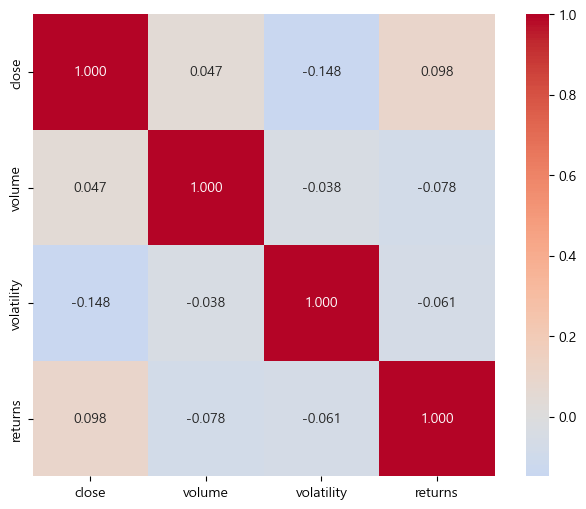

In [ ]:
# 상관관계 (Correlation) - 가격, 거래량, 변동성
cor_matrix = df[['close', 'volume', 'volatility', 'returns']].corr()
print(cor_matrix.round(3))

plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(
    cor_matrix,
    annot=True,
    cmap='coolwarm',
    center=0, 
    square=True, # 정사각형
    fmt='.3f' # 소수점 3자리

)